In [23]:
from plotting import *

# Experiment I: comparing models on perfect absorber tasks

python main.py --cpu 32 --name 0309_pa_compare --num_runs 10 --exp pa_compare

In [ ]:
hparams = ['ac_kwargs_hierarchical', 'ac_kwargs_not_repeat']
abbrs = ['hierarchical', 'np-gating']
folder = '/home/hzwang/Experiments/0309_pa_compare/'
df = compare_across_hparams(folder, hparams, abbrs)

something seems to be wrong with my autoregressive action implementation. 

TODO: make the data loading process faster.

Exp hierarchical:False | np-gating:False, best ret 0.9274+-0.0195, avg ret 0.8787+-0.0320; max ret 0.8798+-0.0316
Exp hierarchical:False | np-gating:True, best ret 0.9708+-0.0111, avg ret 0.9282+-0.0183; max ret 0.9291+-0.0177
Exp hierarchical:True | np-gating:False, best ret 0.9250+-0.0141, avg ret 0.8754+-0.0145; max ret 0.8772+-0.0139
Exp hierarchical:True | np-gating:True, best ret 0.9637+-0.0091, avg ret 0.9194+-0.0142; max ret 0.9199+-0.0144


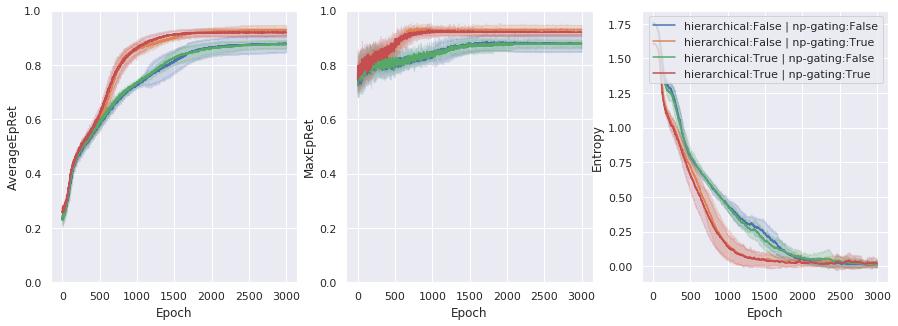

In [166]:
hparams = ['ac_kwargs_hierarchical', 'ac_kwargs_not_repeat']
abbrs = ['hierarchical', 'np-gating']
folder = '/home/hzwang/Experiments/0310_pa_compare/'
df = compare_across_hparams(folder, hparams, abbrs)

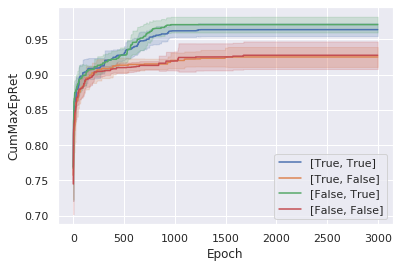

In [172]:
combs = [[True, True], [True, False], [False, True], [False, False]]
for h in combs:
    df_ = select_subset(df, hparams, h)
    df_['CumMaxEpRet'] = df_['MaxEpRet']
    for s in df_['seed'].unique():
        df_.loc[df_['seed']==s, 'CumMaxEpRet'] = df_[df_['seed']==s]['MaxEpRet'].cummax()
    sns.lineplot(x='Epoch', y='CumMaxEpRet', ci='sd', data=df_)
plt.legend(combs)

Cr
Ge
Si
TiO2
MgF2


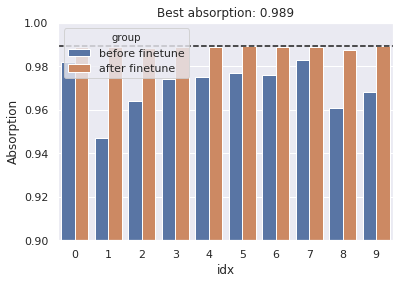

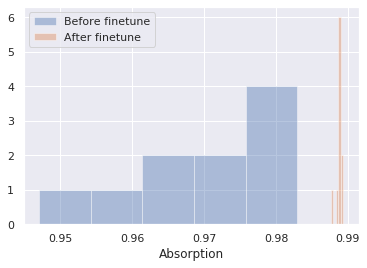

In [170]:
df_ = select_subset(df, hparams, [False, True])
x0s, m0s, merits = extract_designs(np.unique(df_['best_design'].to_numpy()).tolist())
env = get_env_fn('PerfectAbsorberVisNIR-v0', **{'discrete_thick': True,
                              'spectrum_repr': False,                     "bottom_up": False})()

x_opts = []
merits_opt = []
for m0, x0 in tqdm(zip(m0s, x0s)):
    x_opt, res = finetune(env.simulator, x0, m0, env.target)
    merits_opt.append(1 - res.fun)
    
df_ = pd.DataFrame({'idx':list(range(len(merits))) * 2, 'group':['before finetune'] * len(merits) + ['after finetune'] * len(merits), 'Absorption':merits+merits_opt})
    
sns.barplot(x='idx', y='Absorption', data=df_, hue='group')
plt.ylim(0.9, 1.0)
plt.axhline(np.max(merits_opt), linestyle='--', color='k')
plt.title('Best absorption: {:.3f}'.format(np.max(merits_opt)))
plt.show()

sns.distplot(df_[df_['group']=='before finetune']['Absorption'], bins=5, kde=False)
sns.distplot(df_[df_['group']=='after finetune']['Absorption'], bins=5, kde=False)
plt.legend(['Before finetune', 'After finetune'])

In [83]:
df['seed'] = ['$%s$' %s for s in df['seed']]
df['exp_name'] = 'hie:'+ df['ac_kwargs_hierarchical'].astype(str) + ' ' + 'np:'+df['ac_kwargs_not_repeat'].astype(str)

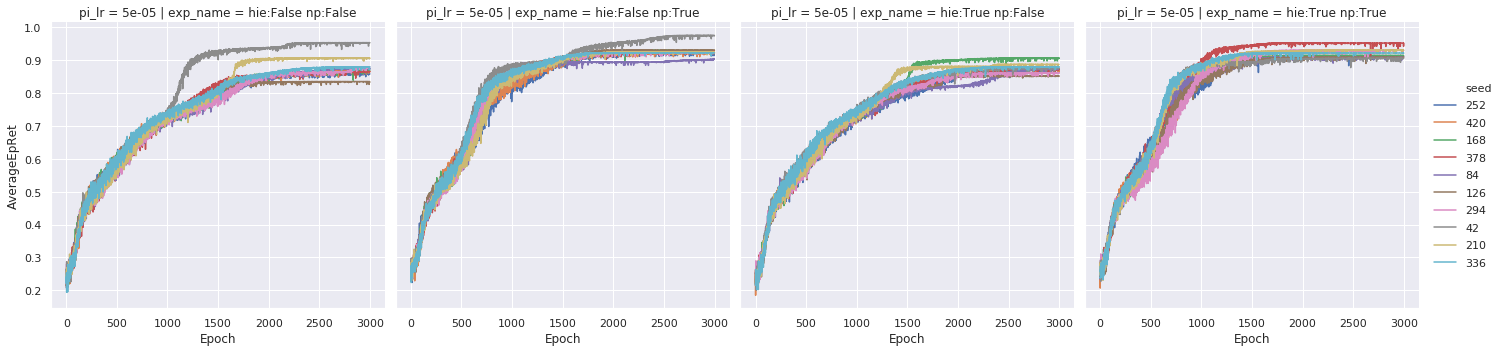

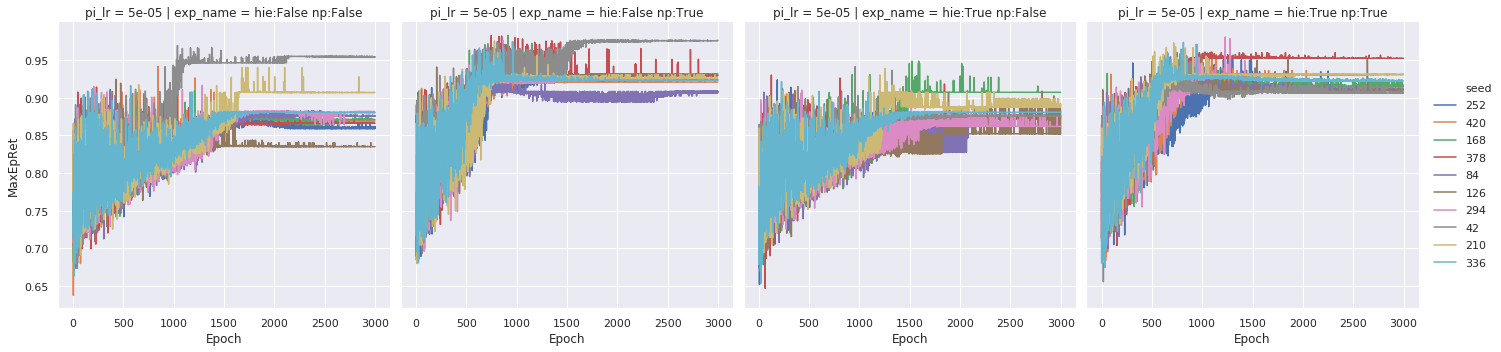

In [84]:
sns.relplot(x='Epoch', y='AverageEpRet', data=df, col='exp_name', ci='sd', hue='seed', kind='line', row='pi_lr')
plt.show()
sns.relplot(x='Epoch', y='MaxEpRet', data=df, col='exp_name', ci='sd', hue='seed', kind='line', row='pi_lr')
plt.show()

In [ ]:
hparams = ['ac_kwargs_hierarchical']
abbrs = ['hie']
folder = '/home/hzwang/Experiments/0310_pa_compare_emb/'
df = compare_across_hparams(folder, hparams, abbrs)

In [ ]:
df.groupby('seed')['MaxEpRet'].max()

In [ ]:
if df['seed'].dtype == int:
    df['seed'] = ['$%s$' %s for s in df['seed']]
sns.relplot(x='Epoch', y='MaxEpRet', data=df, ci='sd', kind='line', hue='seed', col='ac_kwargs_hierarchical')
sns.relplot(x='Epoch', y='AverageEpRet', data=df, ci='sd', kind='line', hue='seed', col='ac_kwargs_hierarchical')

In [ ]:
if df['seed'].dtype == int:
    df['seed'] = ['$%s$' %s for s in df['seed']]
sns.relplot(x='Epoch', y='AverageEpRet', data=df, ci='sd', kind='line', hue='seed', col='ac_kwargs_act_emb')

Exp hierarchical:True | np-gating:False, best ret 0.9044+-0.0371, avg ret 0.8450+-0.0694; max ret 0.8621+-0.0730
Exp hierarchical:True | np-gating:True, best ret 0.9374+-0.0144, avg ret 0.9144+-0.0173; max ret 0.9228+-0.0116
Exp hierarchical:False | np-gating:False, best ret 0.8850+-0.0131, avg ret 0.8080+-0.0113; max ret 0.8241+-0.0088
Exp hierarchical:False | np-gating:True, best ret 0.9302+-0.0173, avg ret 0.9109+-0.0144; max ret 0.9173+-0.0103


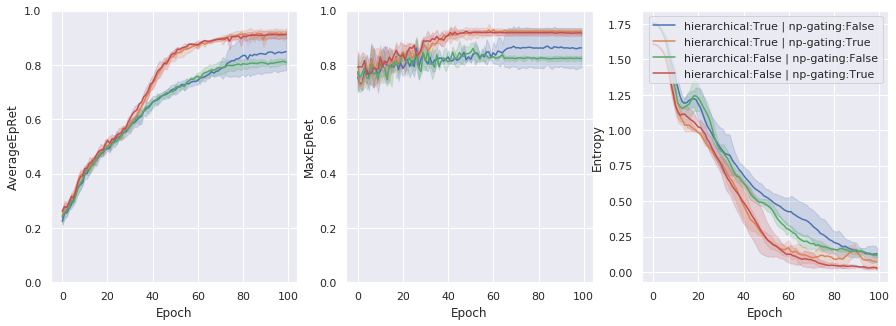

In [78]:
hparams = ['ac_kwargs_hierarchical', 'ac_kwargs_not_repeat']
abbrs = ['hierarchical', 'np-gating']
folder = '/home/hzwang/Experiments/0310_pa_compare_updated/'
df = compare_across_hparams(folder, hparams, abbrs)

In [79]:
df['seed'] = ['$%s$' %s for s in df['seed']]
df['exp_name'] = 'hie:'+ df['ac_kwargs_hierarchical'].astype(str) + ' ' + 'np:'+df['ac_kwargs_not_repeat'].astype(str)

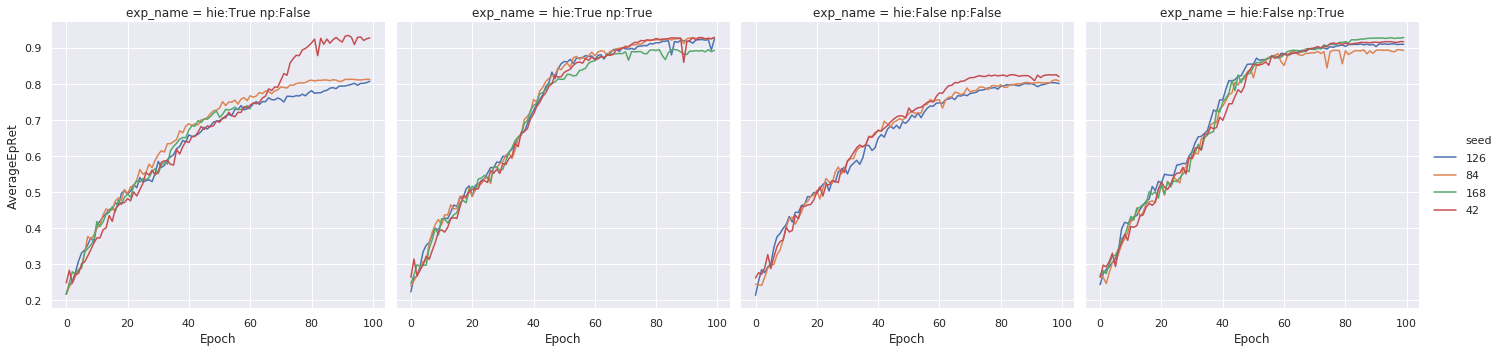

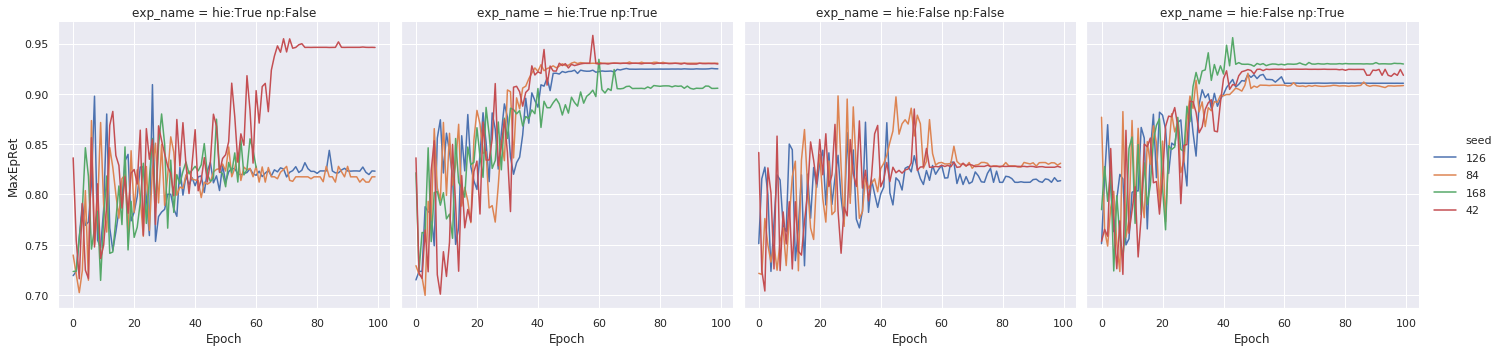

In [80]:
sns.relplot(x='Epoch', y='AverageEpRet', data=df, col='exp_name', ci='sd', hue='seed', kind='line')
plt.show()
sns.relplot(x='Epoch', y='MaxEpRet', data=df, col='exp_name', ci='sd', hue='seed', kind='line')
plt.show()

In [10]:
env = get_env_fn('RadiativeCooler-v0', **{'discrete_thick': True, 'spectrum_repr': False,"bottom_up": False, 'merit_func':cal_reward})()

def batch_finetune(df, env, max_thick=200):
    m0s, x0s, merits = extract_designs(np.unique(df['best_design'].to_numpy()).tolist())
    
    x_opts = []
    merits_opt = []
    for m0, x0 in tqdm(zip(m0s, x0s)):
        x_opt, res = finetune(env.simulator, m0, x0, env.target, bounds=[[15, max_thick]]*len(x0))
        merits_opt.append(1 - res.fun)
        x_opts.append(x_opt)
        print(merits, 1-res.fun)

    df = pd.DataFrame({'idx':list(range(len(merits))) * 2, 'group':['before finetune'] * len(merits) + ['after finetune'] * len(merits), 'Absorption':merits+merits_opt})

    sns.barplot(x='idx', y='Absorption', data=df, hue='group')
    # plt.ylim(0.9, 1.0)
    plt.axhline(np.max(merits_opt), linestyle='--', color='k')
    plt.title('Best absorption: {:.3f}'.format(np.max(merits_opt)))
    plt.show()

    sns.distplot(df[df['group']=='before finetune']['Absorption'], bins=5, kde=False)
    sns.distplot(df[df['group']=='after finetune']['Absorption'], bins=5, kde=False)
    plt.legend(['Before finetune', 'After finetune'])
    
    return x_opts, merits_opt

['SiC 110 nm|SiO2 180 nm|Al2O3 160 nm|SiO2 240 nm|Si3N4 150 nm|MgF2 150 nm|TiO2 130 nm|SiO2 290 nm|HfO2 300 nm|TiO2 30 nm|SiC 130 nm|Si3N4 300 nm|SiC 150 nm|TiO2 290 nm|Si3N4 50 nm|SiO2 270 nm|SiC 260 nm|TiO2 260 nm|SiC 150 nm|MgF2 40 nm|SiO2 140 nm|SiC 280 nm|Al2O3 300 nm|SiC 190 nm|Al2O3 200 nm|Si3N4 210 nm|SiO2 130 nm, Merit 0.263']


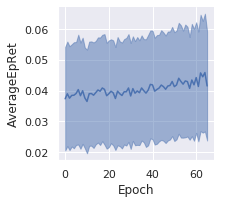

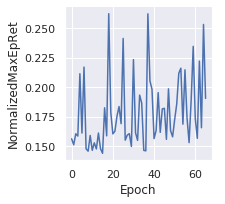

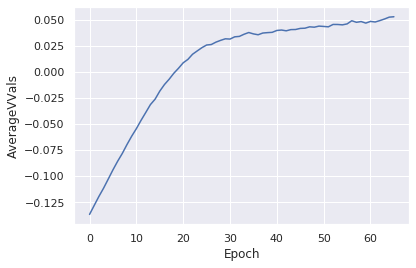

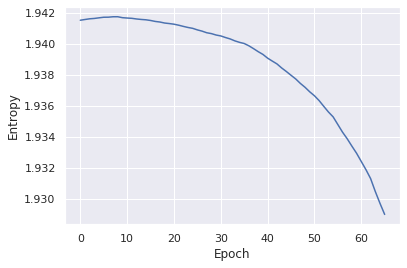

In [42]:
df = plot_results('/home/hzwang/Experiments/0318_light_bulb/')

[['SiC 110 nm|SiO2 180 nm|Al2O3 160 nm|SiO2 240 nm|Si3N4 150 nm|MgF2 150 nm|TiO2 130 nm|SiO2 290 nm|HfO2 300 nm|TiO2 30 nm|SiC 130 nm|Si3N4 300 nm|SiC 150 nm|TiO2 290 nm|Si3N4 50 nm|SiO2 270 nm|SiC 260 nm|TiO2 260 nm|SiC 150 nm|MgF2 40 nm|SiO2 140 nm|SiC 280 nm|Al2O3 300 nm|SiC 190 nm|Al2O3 200 nm|Si3N4 210 nm|SiO2 130 nm, Merit 0.263']]

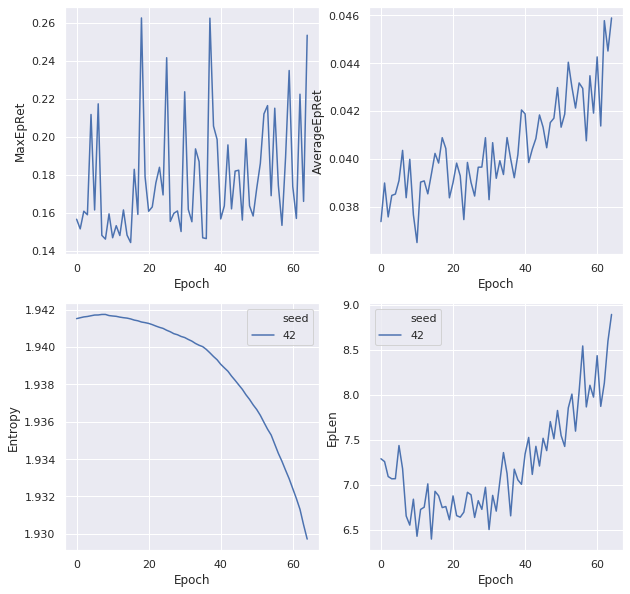

In [41]:
visualize_results('/home/hzwang/Experiments/0318_light_bulb/')

[['HfO2 710 nm|MgF2 310 nm|Al2O3 1010 nm|MgF2 510 nm|TiO2 1710 nm|HfO2 1210 nm|SiC 310 nm|TiO2 1010 nm, Merit 0.518']]

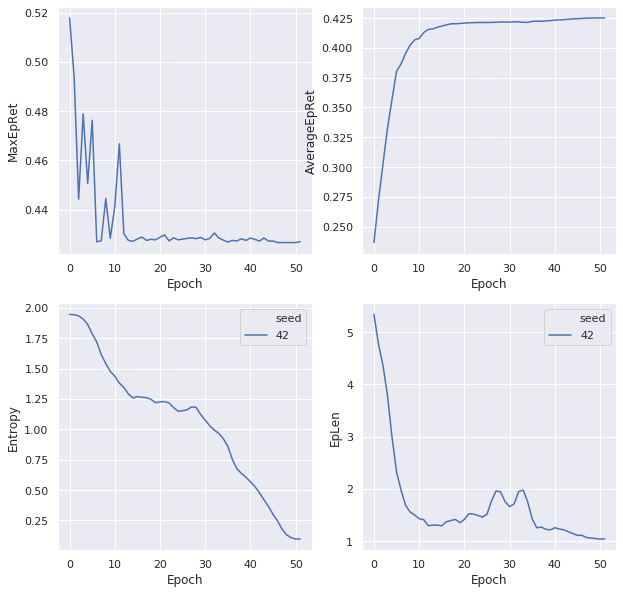

In [50]:
visualize_results('/home/hzwang/Experiments/0318_radiative/')

[['SiC 110 nm|Si3N4 1780 nm|SiC 490 nm|MgF2 1410 nm|SiC 860 nm, Merit 0.503'],
 ['SiC 120 nm|MgF2 1740 nm|SiC 430 nm|MgF2 690 nm|SiC 1400 nm, Merit 0.479'],
 ['SiC 110 nm|MgF2 1870 nm|TiO2 1050 nm|MgF2 1170 nm|SiC 920 nm, Merit 0.471'],
 ['SiC 110 nm|MgF2 1060 nm|SiC 1430 nm|SiO2 1010 nm|SiC 770 nm, Merit 0.485']]

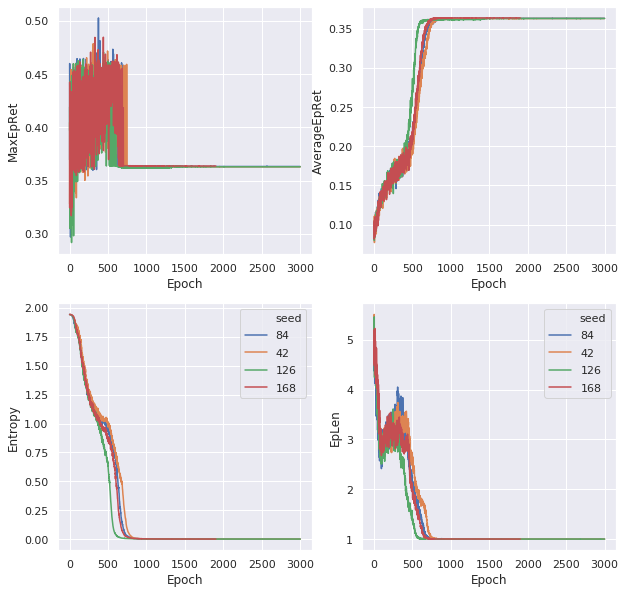

In [21]:
visualize_results('/home/hzwang/Experiments/0317_radiative/')

['MgF2 125 nm|TiO2 65 nm|Ge 35 nm|Cr 40 nm|Si 25 nm|Cr 180 nm, Merit 0.930']


Initial reward 0.9296529662347514
[0.93] 0.939441366639411



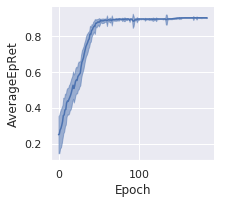

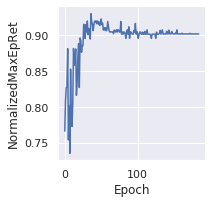

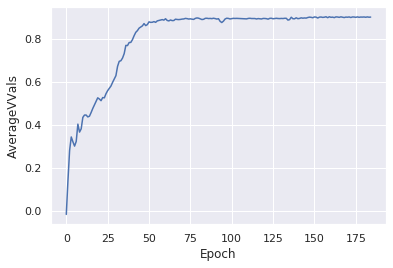

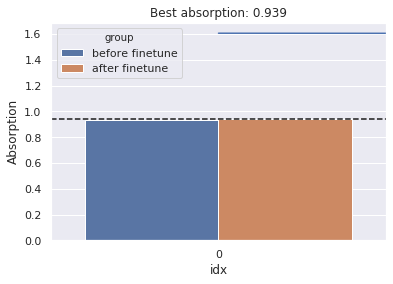

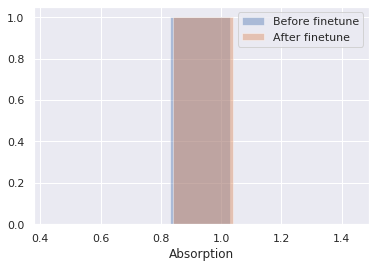

In [62]:
env = get_env_fn('PerfectAbsorberVisNIR-v0', **{'discrete_thick': True, 'spectrum_repr': False,"bottom_up": False, 'merit_func':cal_reward})()
df = plot_results('/home/hzwang/Experiments/0318_test/')
x_opts, merits_opts = batch_finetune(df, env)

['SiC 110 nm|Si3N4 1780 nm|SiC 490 nm|MgF2 1410 nm|SiC 860 nm, Merit 0.503']


Initial reward 0.48472236256399637
[0.485, 0.471, 0.503, 0.479] 0.49264910645585747
Initial reward 0.4706483202499615
[0.485, 0.471, 0.503, 0.479] 0.5097253733690819
Initial reward 0.5028243096236638
[0.485, 0.471, 0.503, 0.479] 0.5155788466752214
Initial reward 0.4785740286588879
[0.485, 0.471, 0.503, 0.479] 0.525146818387067



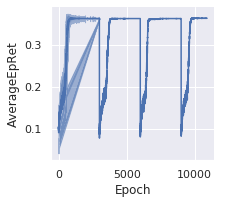

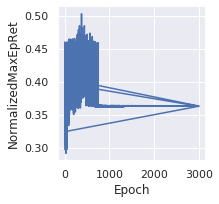

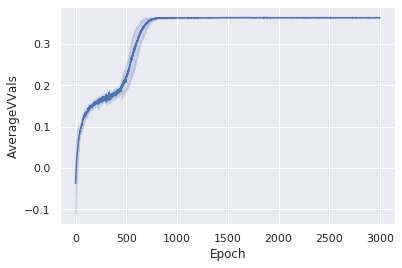

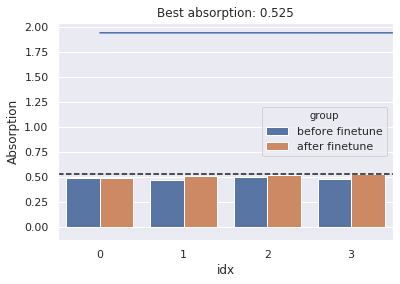

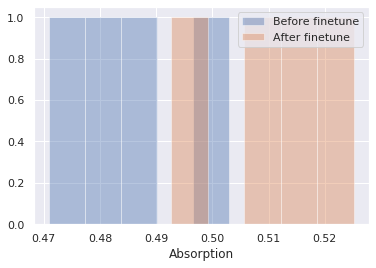

In [22]:
df = plot_results('/home/hzwang/Experiments/0317_radiative/')
x_opts, merits_opts = batch_finetune(df, env)

In [26]:
x0s, m0s, merits = extract_designs(np.unique(df['best_design'].to_numpy()).tolist())
x_opts[np.argmax(merits_opts)], x0s[np.argmax(merits_opts)]

([74, 1797, 404, 725, 1382], ['SiC', 'MgF2', 'SiC', 'MgF2', 'SiC'])

In [ ]:
# import torch
# from torch import nn
# from torch.distributions import Categorical

In [ ]:
# shared = nn.Sequential(nn.Linear(32, 10))
# mlp1 = nn.Sequential(nn.Linear(10, 5))
# mlp2 = nn.Sequential(nn.Linear(15, 5))

# # get hidden
# inp = torch.randn(32)
# hid = shared(inp)

# # get higher level act
# output = mlp1(hid)
# dist = Categorical(logits=output)
# act = dist.sample()

# prev_act = torch.zeros(5)
# prev_act[act] = 1

# # get lower level act
# out = mlp2(torch.cat((hid, prev_act)))
# dist2 = Categorical(logits=out)
# act2 = dist2.sample()
# loss = dist2.log_prob(act2)
# loss.backward()

# # inspect gradient
# list(mlp1.parameters())[0].grad, list(mlp2.parameters())[0].grad[0], list(shared.parameters())[0].grad[0]

the way I'm implementing the hierarchical actions is wrong because there is no gradient flow through the higher level network.

In [22]:
# shared = nn.Sequential(nn.Linear(32, 10))
# mlp1 = nn.Sequential(nn.Linear(10, 5))
# mlp2 = nn.Sequential(nn.Linear(15, 5))

# # get hidden
# inp = torch.randn(32)
# hid = shared(inp)

# # get higher level act
# output = mlp1(hid)
# dist = Categorical(logits=output)
# act = dist.sample()

# prev_act = torch.zeros(5)
# prev_act[act] = dist.log_prob(act)

# # get lower level act
# out = mlp2(torch.cat((hid, prev_act)))
# dist2 = Categorical(logits=out)
# act2 = dist2.sample()
# loss = dist2.log_prob(act2)
# loss.backward()

# # inspect gradient
# list(mlp1.parameters())[0].grad, list(mlp2.parameters())[0].grad[0], list(shared.parameters())[0].grad[0]

In [29]:
# def combine_tracker(folder):
#     '''
#     Merge all buffers
#     '''
#     trackers = []
    
#     if 'design_tracker_merged.pkl' in os.listdir(folder):
#         tracker_file = os.path.join(folder, 'design_tracker_merged.pkl')
#         combined_tracker = pkl.load(open(tracker_file, 'rb'))
#         return combined_tracker

#     for file in os.listdir(folder):
#         if file.startswith('design_tracker_'):
#             tracker_file = os.path.join(folder, file)
#             trackers.append(pkl.load(open(tracker_file, 'rb')))        

#     combined_tracker = DesignTracker(len(trackers[0].layer_ls))
#     max_idx = np.argmax(np.array([tracker.max_ret_ls for tracker in trackers]), axis=0)
#     for e in range(len(trackers[0].layer_ls)):
#         combined_tracker.layer_ls[e] = trackers[max_idx[e]].layer_ls[e]
#         combined_tracker.thick_ls[e] = trackers[max_idx[e]].thick_ls[e]
#         combined_tracker.max_ret_ls[e] = trackers[max_idx[e]].max_ret_ls[e]
    
#     if combined_tracker.layer_ls[-1] != 0:
#         tracker_file = os.path.join(folder, 'design_tracker_merged.pkl')
#         pkl.dump(combined_tracker, open(os.path.join(folder, tracker_file), 'wb'))

#     return combined_tracker

In [30]:
# def load_exp_res(folder):
#     subfolders = [item for item in glob.glob(folder+'/*')]

#     def read_hyper(file_name, rep=10):

#         with open(os.path.join(file_name, 'config.json')) as f:
#             hypers = json.load(f)
#             hypers_dict = {}
#             for k, v in hypers.items():
#                 if k.startswith('logger'):
#                     continue
#                 elif isinstance(v, dict):
#                     for kk, vv in v.items():
#                         if isinstance(vv, list):
#                             hypers_dict[str(k)+'_'+str(kk)] = [vv[0]]*rep
#                         else:
#                             hypers_dict[str(k)+'_'+str(kk)] = [vv]*rep
#                 else: 
#                     hypers_dict[k] = [v] * rep
            
#             hyper_df = pd.DataFrame(hypers_dict)
#             # hyper_df = pd.concat([pd.DataFrame(hypers_dict, index=[0])]*rep, ignore_index=True, axis=0)
#             return hyper_df 

#     first=True # first pandas file to load
#     for subfolder in tqdm(subfolders):
#         runs = glob.glob(subfolder+'/*')
#         num_epochs = len(pd.read_csv(os.path.join(runs[0], 'progress.txt'),sep='\t'))
#         for run in runs:
            
#             t1 = time.time()
#             tracker = combine_tracker(run)
#             t2 = time.time()
#             print(t2 - t1)
#             progress = tracker.print_progress()
#             best_design = progress[np.argmax(tracker.max_ret_ls)]

#             if first:
#                 df = pd.read_csv(os.path.join(run, 'progress.txt'),sep='\t')
#                 hyper_df = read_hyper(run, rep=len(df))
#                 best_designs_df = pd.DataFrame([{'best_design':best_design}]*len(df))
#                 df = pd.concat([df, hyper_df, best_designs_df], axis=1)
#                 first = False

#             else:
#                 df_ = pd.read_csv(os.path.join(run, 'progress.txt'),sep='\t')
#                 hyper_df = read_hyper(run, rep=len(df_))
#                 best_designs_df = pd.DataFrame([{'best_design':best_design}]*len(df_))
#                 df_ = pd.concat([df_, hyper_df, best_designs_df], axis=1)
#                 df = pd.concat([df, df_], axis=0)   

#     return df  

In [31]:
# tracker = combine_tracker('/home/hzwang/Experiments/0319_perfect_absorber6/0319_perfect_absorber6_ac-hie_max6/0319_perfect_absorber6_ac-hie_max6_s42/')

In [2]:
# load_exp_res('/home/hzwang/Experiments/0319_perfect_absorber6')



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:02,  1.07it/s]

 50%|█████     | 2/4 [00:02<00:02,  1.03s/it]

 75%|███████▌  | 3/4 [00:03<00:01,  1.16s/it]

100%|██████████| 4/4 [00:05<00:00,  1.30s/it]


Exp hierarchical:True | np-gating:False, best ret 0.8935+-0.0054, avg ret 0.7552+-0.0013; max ret 0.7555+-0.0006
Exp hierarchical:True | np-gating:True, best ret 0.9419+-0.0116, avg ret 0.9164+-0.0222; max ret 0.9179+-0.0229
Exp hierarchical:False | np-gating:False, best ret 0.8987+-0.0179, avg ret 0.7554+-0.0006; max ret 0.7555+-0.0006
Exp hierarchical:False | np-gating:True, best ret 0.9336+-0.0077, avg ret 0.8873+-0.0177; max ret 0.8880+-0.0178


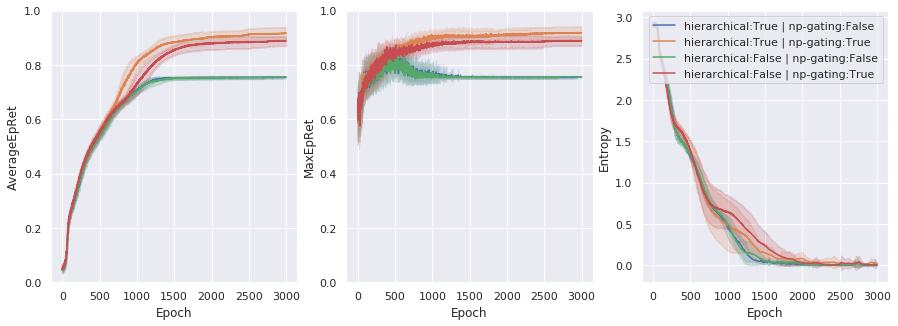

In [62]:
hparams = ['ac_kwargs_hierarchical', 'ac_kwargs_not_repeat']
abbrs = ['hierarchical', 'np-gating']
folder = '/home/hzwang/Experiments/0319_perfect_absorber6'
df = compare_across_hparams(folder, hparams, abbrs)

In [63]:
# df_ = select_subset(df, hparams, [True, True])
# visualize_results(df_)

Initial reward 0.9445459862930904
[0.945, 0.952, 0.935, 0.944, 0.949, 0.927, 0.954, 0.921, 0.938, 0.955] 0.9521419439536845
Initial reward 0.9518242859921264
[0.945, 0.952, 0.935, 0.944, 0.949, 0.927, 0.954, 0.921, 0.938, 0.955] 0.9536318127433173
Initial reward 0.9348965650430395
[0.945, 0.952, 0.935, 0.944, 0.949, 0.927, 0.954, 0.921, 0.938, 0.955] 0.9368803521877419
Initial reward 0.9444810996130065
[0.945, 0.952, 0.935, 0.944, 0.949, 0.927, 0.954, 0.921, 0.938, 0.955] 0.9630287943331529
Initial reward 0.9486192040190667
[0.945, 0.952, 0.935, 0.944, 0.949, 0.927, 0.954, 0.921, 0.938, 0.955] 0.9577890804038919
Initial reward 0.9269046408866211
[0.945, 0.952, 0.935, 0.944, 0.949, 0.927, 0.954, 0.921, 0.938, 0.955] 0.9327576970525923
Initial reward 0.9542017855709424
[0.945, 0.952, 0.935, 0.944, 0.949, 0.927, 0.954, 0.921, 0.938, 0.955] 0.9570304461159418
Initial reward 0.9207990569450915
[0.945, 0.952, 0.935, 0.944, 0.949, 0.927, 0.954, 0.921, 0.938, 0.955] 0.9574429806688521
Initial 

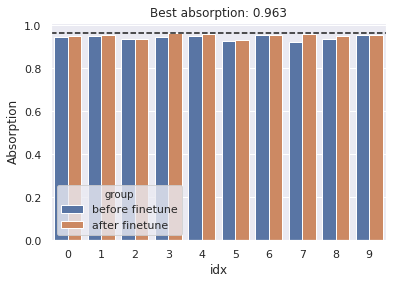

['MgF2', 'Fe2O3', 'Ti', 'MgF2', 'Ti'] [198, 107, 15, 157, 184]


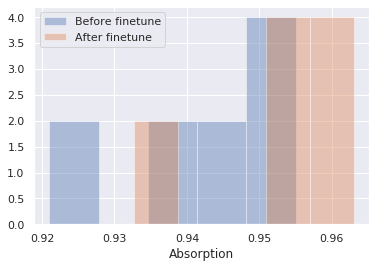

In [64]:
df_ = select_subset(df, hparams, [True, True])
m0s, x0s, merits = extract_designs(np.unique(df_['best_design'].to_numpy()).tolist())

env = get_env_fn('PerfectAbsorberVisNIR-v0', **{'discrete_thick': True,
                              'spectrum_repr': False,
                              "bottom_up": False, 'merit_func':cal_reward})()
x_opts, merits_opts = batch_finetune(df_, env, max_thick=200)
best_idx = np.argmax(merits_opts)
print(m0s[best_idx], x_opts[best_idx])



100%|██████████| 1/1 [00:00<00:00, 16.99it/s]


Exp hierarchical:True | np-gating:True, best ret 0.9312+-nan, avg ret 0.3752+-nan; max ret 0.8025+-nan


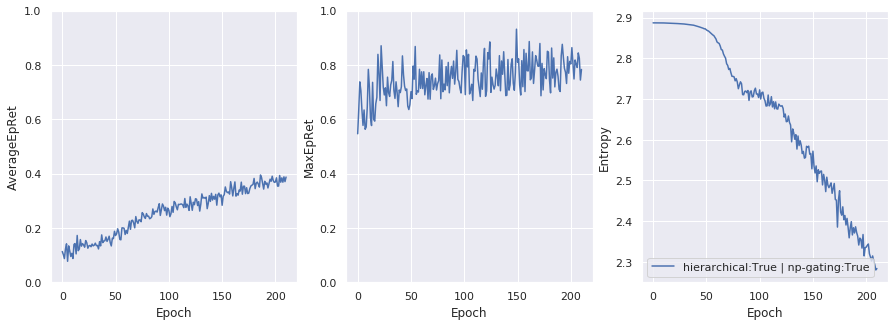

Initial reward 0.931243862698148
[0.931] 0.939437814045909



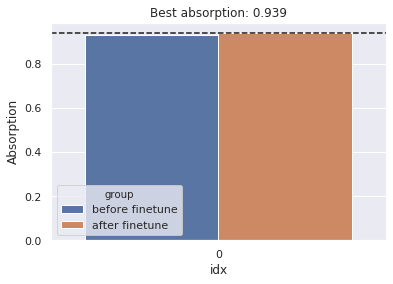

['Al2O3', 'ZnO', 'ZnSe', 'Ti', 'ZnSe', 'Ti', 'Cr'] [116, 53, 76, 15, 77, 193, 105]


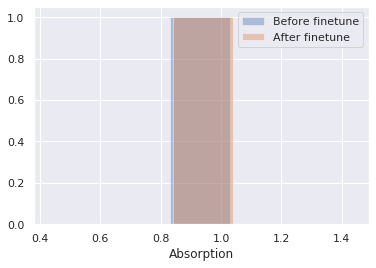

In [68]:
# length=15
hparams = ['ac_kwargs_hierarchical', 'ac_kwargs_not_repeat']
abbrs = ['hierarchical', 'np-gating']
folder = '/home/hzwang/Experiments/0320_perfect_absorber11'
df = compare_across_hparams(folder, hparams, abbrs)

df_ = select_subset(df, hparams, [True, True])
m0s, x0s, merits = extract_designs(np.unique(df_['best_design'].to_numpy()).tolist())

env = get_env_fn('PerfectAbsorberVisNIR-v0', **{'discrete_thick': True,
                              'spectrum_repr': False,
                              "bottom_up": False, 'merit_func':cal_reward})()
x_opts, merits_opts = batch_finetune(df_, env, max_thick=200)
best_idx = np.argmax(merits_opts)
print(m0s[best_idx], x_opts[best_idx])

# Genetic algorithm

In [6]:
def visualize_ga_res(folder):
    
    ax = plt.axes()
    for subfolder in glob.glob(folder+'*'):
        
        df = pd.read_csv(os.path.join(subfolder, 'progress.txt'), sep='\t')
        config = pd.read_json(os.path.join(subfolder, 'config.json'))

        refine_period = config.loc['refine_period'][0]

        sns.lineplot(x='Epoch', y='MaxEpRet', data=df)
        sns.lineplot(x='Epoch', y='AverageEpRet', data=df)
        plt.legend(['Best of the generation', 'Average of the generation'])

        refine_pos = list(range(refine_period, len(df), refine_period))
        for p in refine_pos:
            ax.arrow(p, df['MaxEpRet'].iloc[p-1]-0.05, 0, 0.02, head_width=1, head_length=0.02, fc='k', ec='k')
        
        print(subfolder)
        print(df['Best design'].iloc[-1], df['MaxEpRet'].iloc[-1])

/home/hzwang/Experiments/GA/0310_test/0310_test/0310_test_s42
[['MgF2', 'TiO2', 'Si', 'Ge', 'Cr'], ['110', '53', '30', '31', '200']] 0.9596745000000001


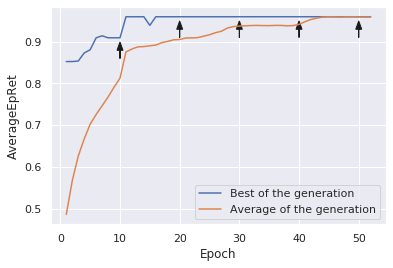

In [70]:
folder = '/home/hzwang/Experiments/GA/0310_test/0310_test/'
_ = visualize_ga_res(folder)

/home/hzwang/Experiments/GA/0310_pa/0310_pa/0310_pa_s294
[['MgF2', 'TiO2', 'Si', 'Ge', 'Cr', 'Ge', 'Cr', 'Ge', 'TiO2', 'Cr'], ['117', '55', '33', '26', '20', '28', '143', '68', '154', '143']] 0.98894817
/home/hzwang/Experiments/GA/0310_pa/0310_pa/0310_pa_s126
[['MgF2', 'TiO2', 'Si', 'Ge', 'Cr', 'Si', 'Cr', 'Ge', 'Si', 'Cr'], ['117', '55', '33', '27', '27', '52', '115', '91', '89', '200']] 0.98901623
/home/hzwang/Experiments/GA/0310_pa/0310_pa/0310_pa_s210
[['MgF2', 'TiO2', 'TiO2', 'Si', 'Ge', 'Cr', 'Ge', 'Cr', 'Ge', 'Cr'], ['116', '31', '24', '32', '26', '21', '28', '77', '175', '141']] 0.9889761999999999
/home/hzwang/Experiments/GA/0310_pa/0310_pa/0310_pa_s378
[['MgF2', 'TiO2', 'Si', 'Cr', 'MgF2', 'Cr', 'TiO2', 'TiO2', 'Cr', 'Cr'], ['117', '56', '36', '15', '123', '178', '119', '23', '22', '65']] 0.98607737
/home/hzwang/Experiments/GA/0310_pa/0310_pa/0310_pa_s336
[['MgF2', 'TiO2', 'Si', 'Ge', 'Cr', 'Si', 'Cr', 'Si', 'MgF2', 'Cr'], ['117', '55', '33', '27', '27', '53', '42', '199', '19

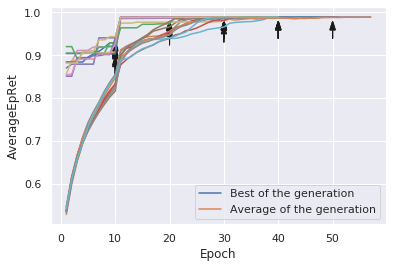

In [74]:
folder = '/home/hzwang/Experiments/GA/0310_pa/0310_pa/'
_ = visualize_ga_res(folder)

/home/hzwang/Experiments/GA/0316_piano_black/0316_piano_black/0316_piano_black_s42
[['Al2O3', 'ZnSe', 'Ge'], ['73', '22', '162']] 0.9223678


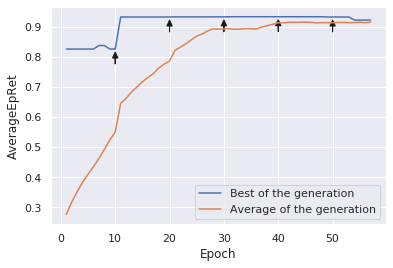

In [7]:
folder = '/home/hzwang/Experiments/GA/0316_piano_black/0316_piano_black/'
_ = visualize_ga_res(folder)

Ag
Al
Al2O3
Cr
Ge
HfO2
MgF2
Ni
Si
Si3N4
SiO2
Ti
TiN
TiO2
ZnO
ZnS
ZnSe
PECVD-Si
Sputter-Si
Fe2O3


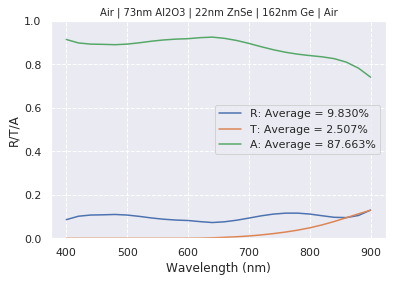

In [8]:
env = get_env_fn('PianoBlack-v0', **{'discrete_thick': True,
                              'spectrum_repr': False,
                              "bottom_up": False, 'R':0.1})()
plt.figure()
R, T, A = env.simulator.spectrum(['Al2O3', 'ZnSe', 'Ge'], [np.inf]+[73, 22, 162] + [np.inf], title='True', plot='True')

OPENBLAS_MAIN_FREE=1 python genetic_algo.py --exp_name 0310_piano_black --cpu 32 --env PianoBlack-v0 --maxlen 3

Ag
Al
Al2O3
Cr
Ge
HfO2
MgF2
Ni
Si
Si3N4
SiO2
Ti
TiN
TiO2
ZnO
ZnS
ZnSe
PECVD-Si
Sputter-Si
Fe2O3


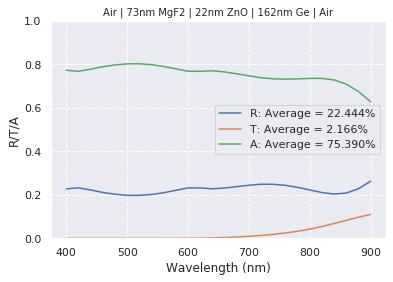

In [9]:
env = get_env_fn('PianoBlack-v0', **{'discrete_thick': True,
                              'spectrum_repr': False,
                              "bottom_up": False, 'R':20})()
plt.figure()
R, T, A = env.simulator.spectrum(['MgF2', 'ZnO', 'Ge'], [np.inf]+[73, 22, 162] + [np.inf], title='True', plot='True')

# Radiative cooler

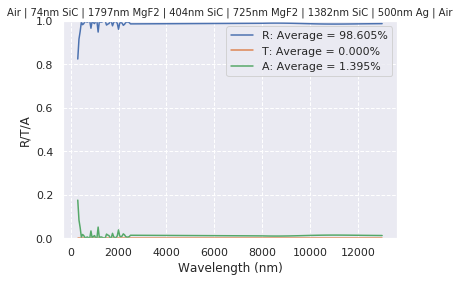

In [11]:
env_name = 'RadiativeCooler-v0'
env_kwargs = {'discrete_thick': True,
              'spectrum_repr': False,
              "bottom_up": False,
              "merit_func": cal_merit_mse}

mat = ['TiO2', 'MgF2', 'SiC', 'MgF2', 'SiC', 'MgF2', 'SiC', 'MgF2', 'SiC'] 
thick = ['1752', '1004', '23', '1414', '143', '326', '218', '1226', '846']

mat = ['SiC', 'MgF2', 'SiC', 'MgF2', 'SiC', 'MgF2', 'SiC', 'MgF2', 'SiC']
thick = ['87', '1057', '15', '1724', '15', '343', '215', '1485', '814']

# ['SiC 60 nm|MgF2 1540 nm|SiC 880 nm|MgF2 210 nm|SiC 770 nm|MgF2 1650 nm|SiC 770 nm, Merit 0.469']
# ['SiC 120 nm|MgF2 1740 nm|SiC 430 nm|MgF2 690 nm|SiC 1400 nm, Merit 0.479']
mat = ['SiC', 'MgF2', 'SiC', 'MgF2', 'SiC']
thick = [74, 1797, 404, 725, 1382]

thick = [np.inf] + [int(item) for item in thick] + [np.inf]

env = get_env_fn(env_name, **env_kwargs)()

plt.figure()
R, T, A = env.simulator.spectrum(mat, thick, title='True', plot='True')

(0, 1)

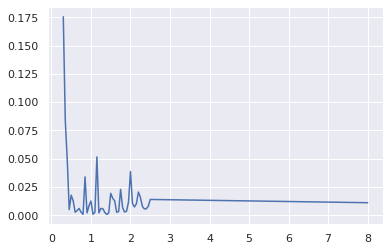

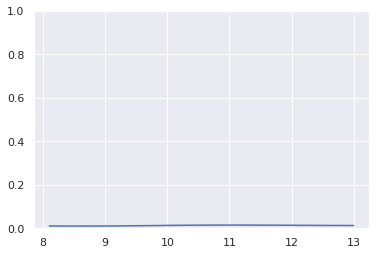

In [13]:
plt.plot(env.simulator.wavelength[:46], 1-R[:46])
plt.figure()
plt.plot(env.simulator.wavelength[46:], 1-R[46:])
plt.ylim([0,1])

# light bulb

In [53]:
env_name = 'IncadescentReflector-v0'
env_kwargs = {'discrete_thick': True,
              'spectrum_repr': False,
              "bottom_up": False,
              "merit_func": cal_reward}

eps=1e-7
wavelengths1 = np.arange(0.4, 0.7+eps, 0.001)
wavelengths2 = np.arange(0.705, 3, 0.01)
wavelengths = np.concatenate(
    (wavelengths1, wavelengths2))

target1r, target2r = np.zeros_like(wavelengths1), np.ones_like(wavelengths2)
target1t, target2t = np.ones_like(wavelengths1), np.zeros_like(wavelengths2)

materials = ['HfO2', 'SiO2', 'Al2O3', 'MgF2', 'TiO2', 'SiC', 'Si3N4']
simulator = TMM_sim(materials, wavelengths, substrate='Air', substrate_thick=500)

df = load_exp_res('/home/hzwang/Experiments/0318_light_bulb/')
# df = plot_results('/home/hzwang/Experiments/0318_light_bulb/')

0.4532083199949755
0.9632362180445517


(None, None)

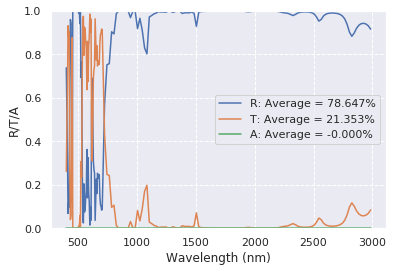

In [49]:
m0s, x0s, merits = extract_designs(np.unique(df['best_design'].to_numpy()).tolist())
mat = m0s[np.argmax(merits)]
thick = [np.inf] + x0s[np.argmax(merits)] + [np.inf]

plt.figure()
R, T, A = simulator.spectrum(mat, thick, plot=True)
print(R[:len(wavelengths1)].mean()), print(R[len(wavelengths1):].mean())

Initial reward 0.6598599991586082
[0.457, 0.6] 0.7477929378709387
Initial reward 0.7228387613515648
[0.457, 0.6] 0.8304407953287416



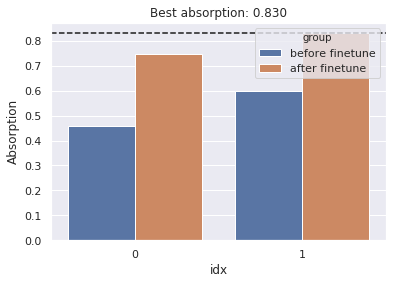

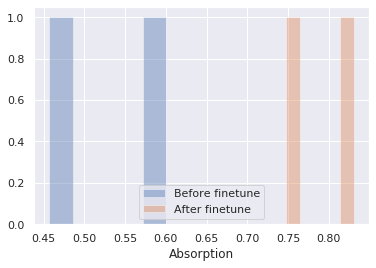

In [34]:
env = get_env_fn('IncandescentReflector-v0', **{'discrete_thick': True,
                              'spectrum_repr': False,
                              "bottom_up": False, 'merit_func':cal_reward})()
x_opts, merits_opts = batch_finetune(df, env, max_thick=400)

In [54]:
best_idx = np.argmax(merits_opts)
mat = m0s[best_idx]
thick = [np.inf] + x_opts[best_idx] + [np.inf]

plt.figure()
R, T, A = simulator.spectrum(mat, thick, plot=True)
print(R[:len(wavelengths1)].mean()), print(R[len(wavelengths1):].mean())

ValueError: Problem with n_list or d_list!

<Figure size 432x288 with 0 Axes>

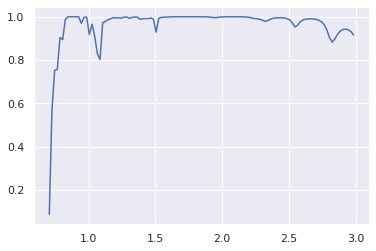

In [51]:
plt.plot(wavelengths[len(wavelengths1):], R[len(wavelengths1):])

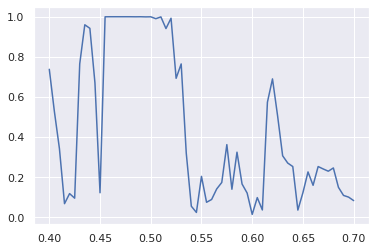

In [52]:
plt.plot(wavelengths[:len(wavelengths1)], R[:len(wavelengths1)])